In [1]:

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import os
import pickle

In [2]:
file_path = '../Sup/dataset.csv'
dataset = pd.read_csv(file_path,header=None)

dataset.head()

,0,1,2
0,Â‘Endgame' more than lives up to the hype. Aft...,DIRECTING#PERFORMANCE,Positive
1,The most epic 4th installment of Marvel's The ...,WRITING#PERFORMANCE,Positive
2,I'd give it a 10 if they didn't completely scr...,CAST#PERFORMANCE,Positive
3,"I thought it was a Fantastic Movie. Well done,...",CAST#PERFORMANCE,Positive
4,I recently watched this movie again and found ...,CAST#PERFORMANCE,Positive


In [3]:
data = dataset.loc[:,0]
data.head()

0    Â‘Endgame' more than lives up to the hype. Aft...
1    The most epic 4th installment of Marvel's The ...
2    I'd give it a 10 if they didn't completely scr...
3    I thought it was a Fantastic Movie. Well done,...
4    I recently watched this movie again and found ...
Name: 0, dtype: object

In [5]:
label_cat = dataset.loc[:,1]
label_pol = dataset.loc[:,2]
label_cat.unique()
#label_pol.unique()

array(['DIRECTING#PERFORMANCE', 'WRITING#PERFORMANCE', 'CAST#PERFORMANCE',
       'PERFOMANCE#GENERAL', 'CREW#PERFORMANCE', 'PRODUCTION#PERFOMANCE'],
      dtype=object)

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
sentiment_terms = []
for review in nlp.pipe(data):
        if review.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')
dataset[4] = sentiment_terms
dataset.head(10)

,0,1,2,4
0,Â‘Endgame' more than lives up to the hype. Aft...,DIRECTING#PERFORMANCE,Positive,live deliver thrill fright emotional wrap
1,The most epic 4th installment of Marvel's The ...,WRITING#PERFORMANCE,Positive,epic 4th love
2,I'd give it a 10 if they didn't completely scr...,CAST#PERFORMANCE,Positive,screw
3,"I thought it was a Fantastic Movie. Well done,...",CAST#PERFORMANCE,Positive,think polished cap think botch destroy walk ra...
4,I recently watched this movie again and found ...,CAST#PERFORMANCE,Positive,watch find like second great great
5,The epic conclusion to an 22 film story arc th...,CAST#PERFORMANCE,Positive,epic start perfect good drive hit final delive...
6,this movie was an incredible wrap up to the fi...,CAST#PERFORMANCE,Positive,incredible previous watch see
7,Wish Thanos wasnÂ’t killed in the beginning bu...,CAST#PERFORMANCE,Positive,kill overall good
8,"Great movie, the perfect closing for this amaz...",CAST#PERFORMANCE,Positive,great perfect amazing brilliant
9,Endgame is the culmination of the Infinity Sag...,PERFOMANCE#GENERAL,Positive,massive fill amazing visual great terrific bel...


In [8]:
model = Sequential()
model.add(Dense(512, input_shape=(6000,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(data)
aspect_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(dataset[4]))

Using TensorFlow backend.


In [10]:
lbl_encoder = LabelEncoder()
dataset[5] = lbl_encoder.fit_transform(label_pol)

dataset.head(15)

,0,1,2,4,5
0,Â‘Endgame' more than lives up to the hype. Aft...,DIRECTING#PERFORMANCE,Positive,live deliver thrill fright emotional wrap,2
1,The most epic 4th installment of Marvel's The ...,WRITING#PERFORMANCE,Positive,epic 4th love,2
2,I'd give it a 10 if they didn't completely scr...,CAST#PERFORMANCE,Positive,screw,2
3,"I thought it was a Fantastic Movie. Well done,...",CAST#PERFORMANCE,Positive,think polished cap think botch destroy walk ra...,2
4,I recently watched this movie again and found ...,CAST#PERFORMANCE,Positive,watch find like second great great,2
5,The epic conclusion to an 22 film story arc th...,CAST#PERFORMANCE,Positive,epic start perfect good drive hit final delive...,2
6,this movie was an incredible wrap up to the fi...,CAST#PERFORMANCE,Positive,incredible previous watch see,2
7,Wish Thanos wasnÂ’t killed in the beginning bu...,CAST#PERFORMANCE,Positive,kill overall good,2
8,"Great movie, the perfect closing for this amaz...",CAST#PERFORMANCE,Positive,great perfect amazing brilliant,2
9,Endgame is the culmination of the Infinity Sag...,PERFOMANCE#GENERAL,Positive,massive fill amazing visual great terrific bel...,2


In [11]:
y = dataset[5]

In [12]:
import matplotlib.pylab as plt

def plot_var(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc , label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

0 501
4 497
Train on 501 samples, validate on 493 samples
Epoch 1/5
501/501 [==============================] - 2s 3ms/sample - loss: 0.2629 - accuracy: 0.0359 - val_loss: -0.4481 - val_accuracy: 0.0304
Epoch 2/5
501/501 [==============================] - 0s 274us/sample - loss: -1.0433 - accuracy: 0.0319 - val_loss: -1.9932 - val_accuracy: 0.0365
Epoch 3/5
501/501 [==============================] - 0s 268us/sample - loss: -2.8584 - accuracy: 0.0359 - val_loss: -4.1416 - val_accuracy: 0.0467
Epoch 4/5
501/501 [==============================] - 0s 253us/sample - loss: -5.3034 - accuracy: 0.0479 - val_loss: -7.2030 - val_accurac

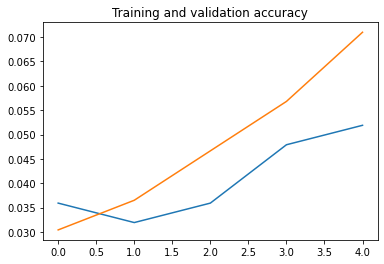

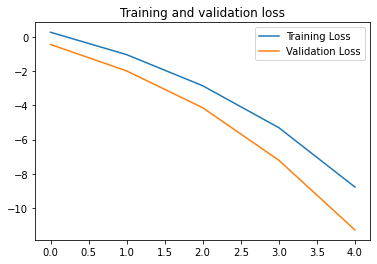

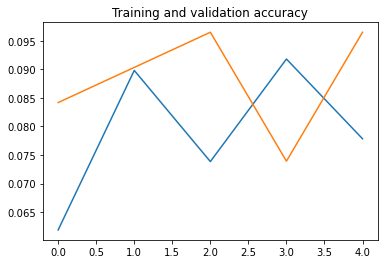

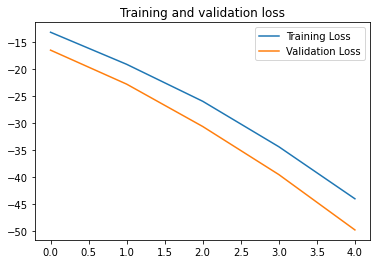

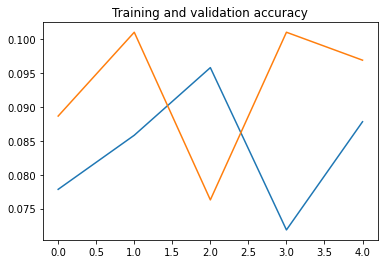

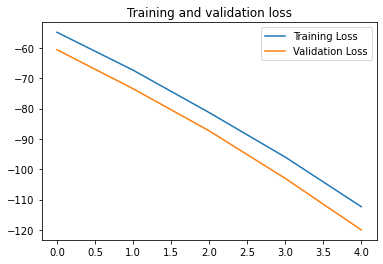

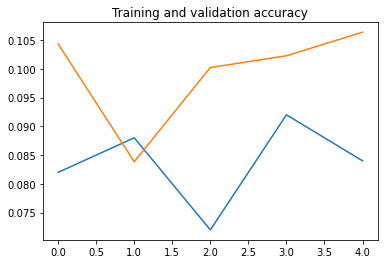

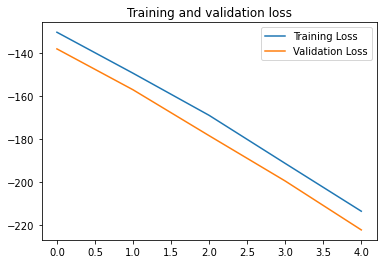

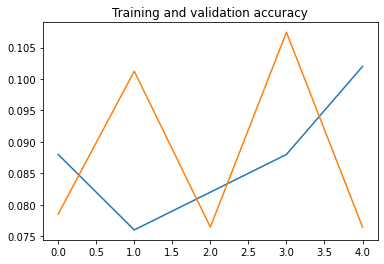

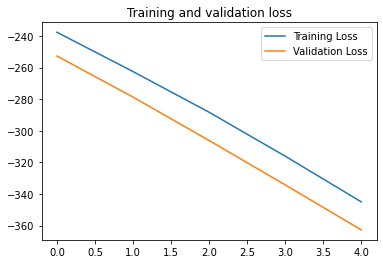

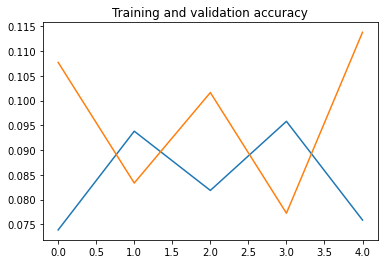

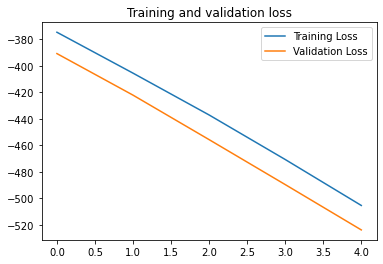

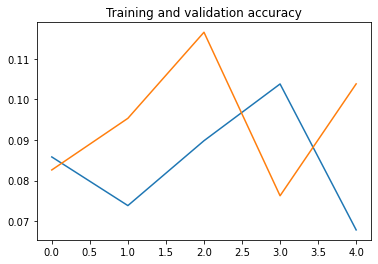

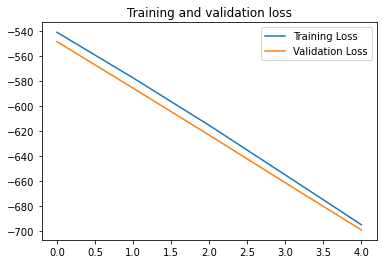

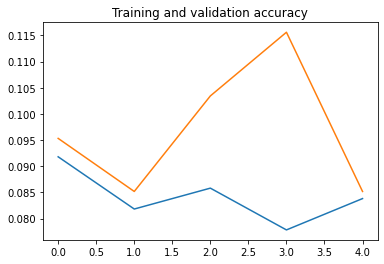

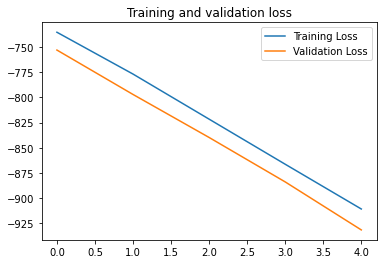

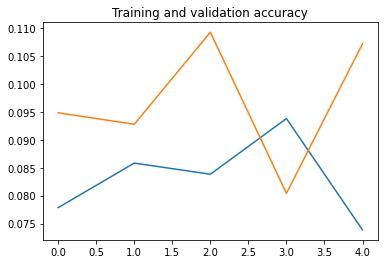

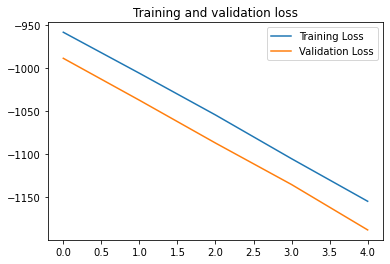

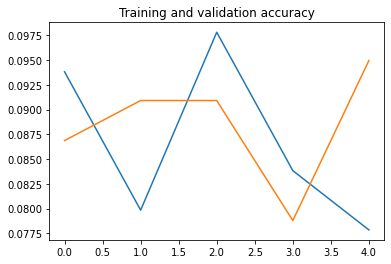

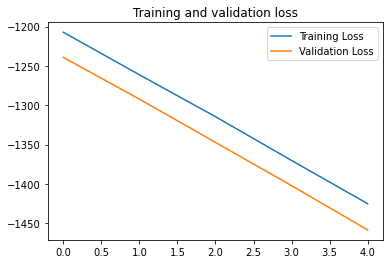

In [13]:
from sklearn.model_selection import KFold

cv = KFold(10,shuffle=True,random_state=1)
for train_ind,test_ind in cv.split(aspect_tokenized):
    print(train_ind[0],train_ind[-1])
    print(test_ind[0],test_ind[-1])
    train_start,train_end,test_start,test_end = train_ind[0],train_ind[-1],test_ind[0],test_ind[-1]
    X_train, X_test, y_train, y_test = aspect_tokenized.loc[train_start:train_end-1,:],\
                                       aspect_tokenized.loc[test_start:test_end-1,:], \
                                       y[train_start:train_end], \
                                       y[test_start:test_end]
    history = model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test,y_test))
    plot_var(history)

model saving

In [29]:
model_save_path = '../Sup'
weight_save_path = '../Sup'
if not os.path.exists(model_save_path):
    os.mkdir(model_save_path)
if not os.path.exists(weight_save_path):
    os.mkdir(weight_save_path)
model.save( '../Sup/sentimental_model.h5')
model.save_weights( "../Sup/sentimental_model_weights.h5")

In [36]:
# saving
#if not os.path.exists('../Sup/tokenizer.pickle'):
#    os.mkdir('../Sup/tokenizer.pickle')
with open('../Sup/sentimental_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
with open('../Sup/sentimental_labeleEncorder.pkl', 'wb') as handle:
    pickle.dump(lbl_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)